## Importing Data

 - A CIFAR-10 image has dimensions of 32x32 pixels, and each pixel contains 3 values corresponding to the Red, Green, and Blue channels.
 - The total number of features in one image is: 32 × 32 × 3 = 3072 features

In [3]:
#The archive contains the files data_batch_1, data_batch_2, ..., data_batch_5, as well as test_batch. 
#Each of these files is a Python "pickled" object produced with cPickle. Here is a python2 routine 
# which will open such a file and return a dictionary:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [4]:
file1 = r'/Users/laurenfuller/Desktop/ECEN 758/cifar-10-batches-py/data_batch_1'
file2 = r'/Users/laurenfuller/Desktop/ECEN 758/cifar-10-batches-py/data_batch_2'
file3 = r'/Users/laurenfuller/Desktop/ECEN 758/cifar-10-batches-py/data_batch_3'
file4 = r'/Users/laurenfuller/Desktop/ECEN 758/cifar-10-batches-py/data_batch_4'
file5 = r'/Users/laurenfuller/Desktop/ECEN 758/cifar-10-batches-py/data_batch_5'

In [5]:
data_batch_1 = unpickle(file1)
data_batch_2 = unpickle(file2)
data_batch_3 = unpickle(file3)
data_batch_4 = unpickle(file4)
data_batch_5 = unpickle(file5)

In [6]:
len(data_batch_1[b'labels'])

10000

## Basic Data Info

In [8]:
type(data_batch_1)

dict

In [9]:
len(data_batch_1)

4

In [10]:
data_batch_1.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [11]:
#our data is a 2-D array
data_batch_1[b'data']

array([[ 59,  43,  50, ..., 140,  84,  72],
       [154, 126, 105, ..., 139, 142, 144],
       [255, 253, 253, ...,  83,  83,  84],
       ...,
       [ 71,  60,  74, ...,  68,  69,  68],
       [250, 254, 211, ..., 215, 255, 254],
       [ 62,  61,  60, ..., 130, 130, 131]], dtype=uint8)

In [12]:
data_batch_1[b'data'].shape
#we have 10,000 images, and each image has 3072 entries

(10000, 3072)

In [13]:
#first image in data_batch 1
data_batch_1[b'data'][0]

array([ 59,  43,  50, ..., 140,  84,  72], dtype=uint8)

In [14]:
#first image as 3072 entries
data_batch_1[b'data'][0].shape

(3072,)

## Reshaping Image Data for Use

In [16]:
#For just one image:

#we are tyring to reshape the 3072 array into 3 32 x 32 matrices. 
image = data_batch_1[b'data'][0]
image = image.reshape(3,32,32)
print(image.shape)

#we then transpose that into 32 matrices having 32 rows and 3 columns
image = image.transpose(1,2,0)
print(image.shape)
#image

(3, 32, 32)
(32, 32, 3)


In [17]:
#putting all image data of batch 1 in standard (10000, 32, 32, 3) format:

data_b1 = data_batch_1[b'data']
data_b1 = data_b1.reshape(len(data_b1), 3,32,32).transpose(0,2,3,1)
#print(data_b1.shape)
data_b2 = data_batch_2[b'data']
data_b2 = data_b2.reshape(len(data_b2), 3,32,32).transpose(0,2,3,1)
#print(data_b2.shape)
data_b3 = data_batch_3[b'data']
data_b3 = data_b3.reshape(len(data_b3), 3,32,32).transpose(0,2,3,1)
#print(data_b1.shape)
data_b4 = data_batch_4[b'data']
data_b4 = data_b4.reshape(len(data_b4), 3,32,32).transpose(0,2,3,1)
#print(data_b1.shape)
data_b5 = data_batch_5[b'data']
data_b5 = data_b5.reshape(len(data_b5), 3,32,32).transpose(0,2,3,1)
#print(data_b1.shape)
all_train_data = np.concatenate([data_b1, data_b2, data_b3, data_b4, data_b5], axis=0)
print(all_train_data.shape)

all_train_labels = np.concatenate([data_batch_1[b'labels'], data_batch_2[b'labels'], data_batch_3[b'labels'], data_batch_4[b'labels'], data_batch_5[b'labels']])
print(all_train_labels.shape)

(50000, 32, 32, 3)
(50000,)


## Normalizing the Training Data

In [19]:
#We want to divide each pixel value by 255.
#We do this b/c a pixel value ranges from 0 to 255 for each of the Red, Blue, and Green channels.
#If you divide by 255, you normalize the pixel into a 0 to 1 range.

all_train_data = all_train_data / 255

## Visualization of Images from Batch 1

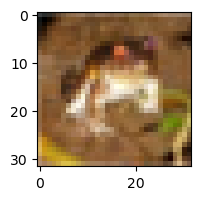

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,2))
plt.imshow(image)

In [22]:
#putting all image data of batch 1 in standard (10000, 32, 32, 3) format:
data_b1 = data_batch_1[b'data']
data_b1 = data_b1.reshape(len(data_b1), 3,32,32).transpose(0,2,3,1)
print(data_b1.shape)
data_b2 = data_batch_2[b'data']
data_b2 = data_b2.reshape(len(data_b2), 3,32,32).transpose(0,2,3,1)
print(data_b2.shape)
data_b3 = data_batch_3[b'data']
data_b3 = data_b3.reshape(len(data_b3), 3,32,32).transpose(0,2,3,1)
print(data_b1.shape)
data_b4 = data_batch_4[b'data']
data_b4 = data_b4.reshape(len(data_b4), 3,32,32).transpose(0,2,3,1)
print(data_b1.shape)
data_b5 = data_batch_5[b'data']
data_b5 = data_b5.reshape(len(data_b5), 3,32,32).transpose(0,2,3,1)
print(data_b1.shape)
all_train_data = np.concatenate([data_b1, data_b2, data_b3, data_b4, data_b5], axis=0)
print(all_train_data.shape)

(10000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 32, 32, 3)


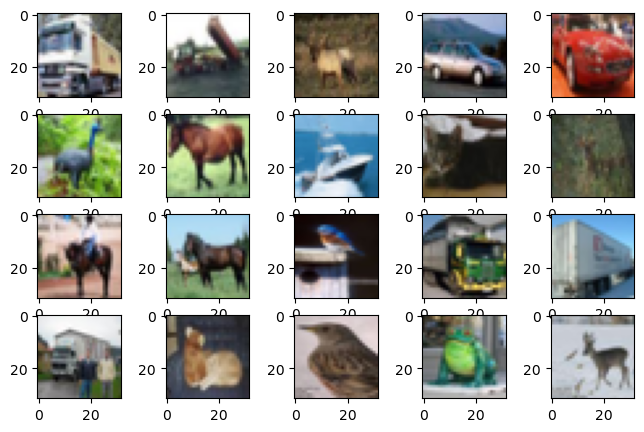

In [23]:
columns = 5
rows = 4
fig = plt.figure(figsize=(8,5))
for i in range(1, columns*rows + 1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(data_b1[i])
plt.show()

## EDA
airplane : 0, automobile : 1, bird : 2, cat : 3, deer : 4, dog : 5, frog : 6, horse : 7, ship : 8, truck : 9

In [25]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
all_train_data = all_train_data / 255

### Label Distribution

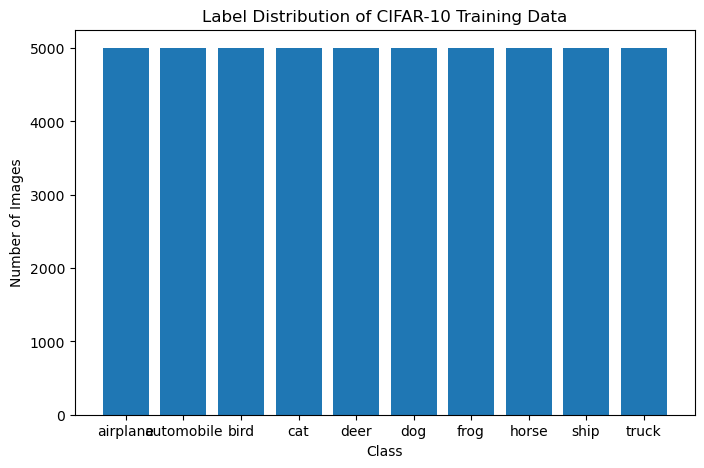

In [27]:
#Does the dataset have balanced classes?

label_counts = np.bincount(all_train_labels)

# Plot the distribution
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(8, 5))
plt.bar(classes, label_counts)
plt.title("Label Distribution of CIFAR-10 Training Data")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()

### Example Images from each Class

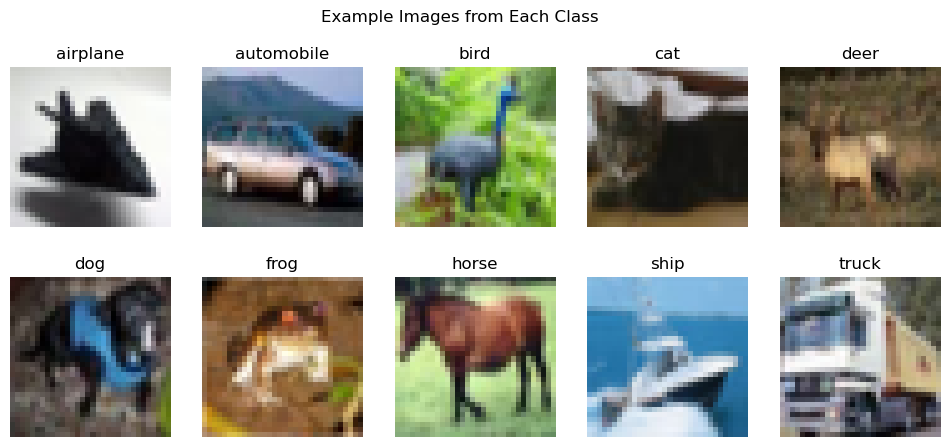

In [84]:
### Images from each class
# Plot some sample images
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    # Find the first image of each class
    idx = np.where(all_train_labels == i)[0][0]
    ax.imshow(all_train_data[idx])
    ax.set_title(labels[i])
    ax.axis("off")
plt.suptitle("Example Images from Each Class")
plt.show()

### Pixel Intensity Distribution

- Pixel intensity refers to the brightness or color of individual pixels in an image, typically ranging from 0 (black) to 255 (white) for each color channel (red, green, blue in RGB).
-  Higher pixel intensities generally indicate lighter colors (closer to white), while lower intensities represent darker colors (closer to black).
- Analyzing the average pixel intensity across images in a class helps you understand the dominant color or brightness in the images of that class. For instance, images of airplanes may have different lighting patterns compared to cats or dogs.

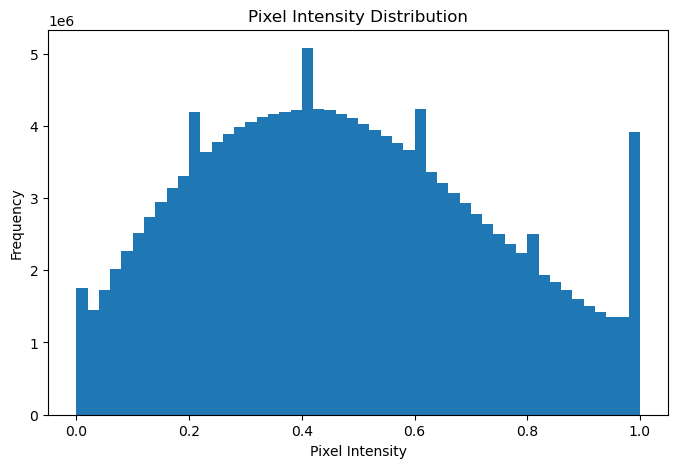

In [86]:
all_train_data

# Need to flatten the image data to get all pixel values in one array:
pixels = all_train_data.flatten()

plt.figure(figsize=(8, 5))
plt.hist(pixels, bins=50)
plt.title("Pixel Intensity Distribution")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

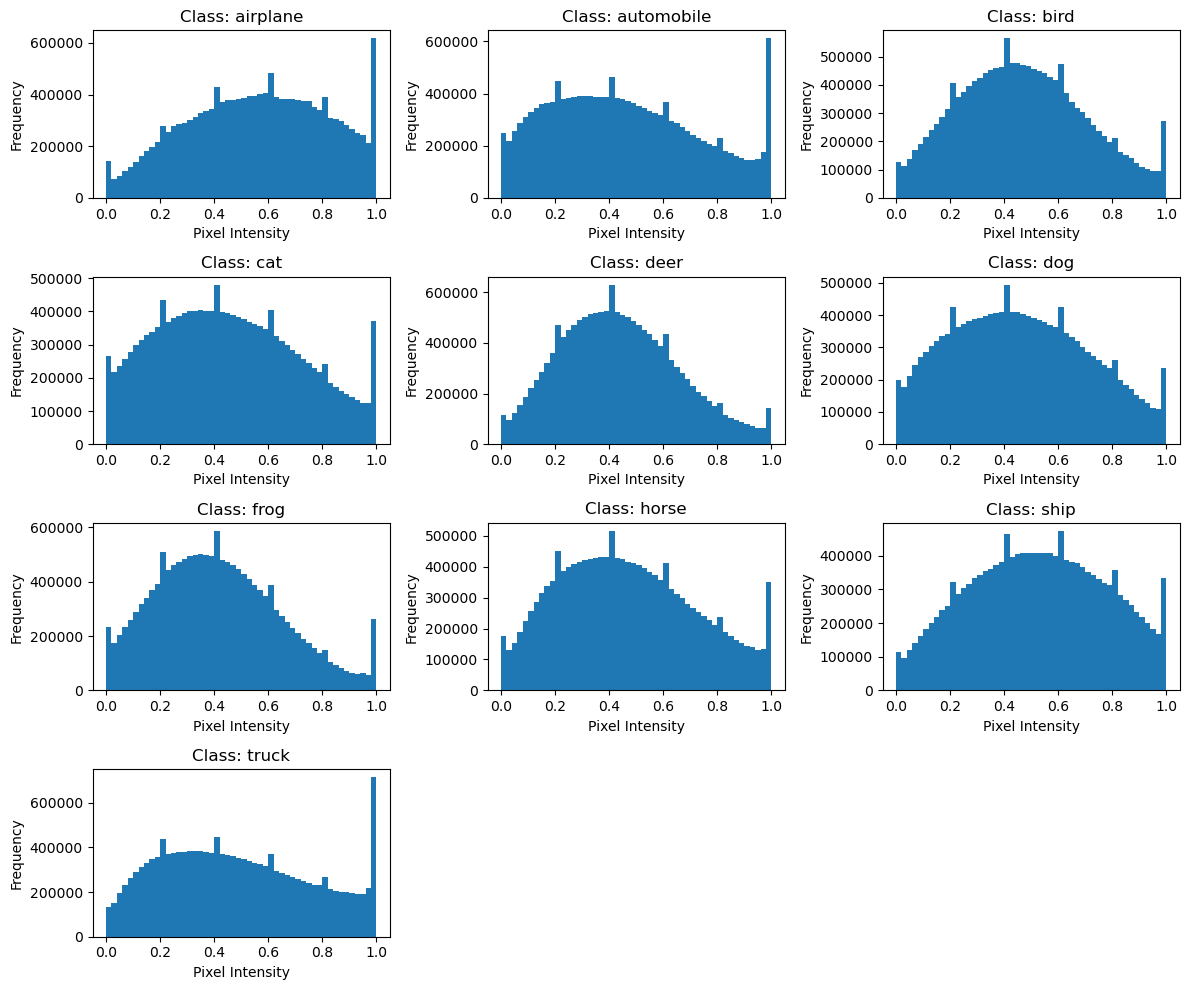

In [88]:
plt.figure(figsize=(12, 10))

for label in range(10):
    #Get the  data for the current class
    class_data = all_train_data[all_train_labels == label]
    
    # Need to flatten the image data
    pixels = class_data.flatten()
    
    # Plot the distribution for the current class
    plt.subplot(4, 3, label + 1)
    plt.hist(pixels, bins=50)
    plt.title(f"Class: {classes[label]}")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

### Pixel Intensity Quantitative

- Mean gives us an idea of the typical pixel intensity across the images in a class. If the mean is high, it means that the images are generally bright.
- Standard deviation tells how varied the pixel intensities are across the images. A low standard deviation means the images are similar in pixel intensity, while a high standard deviation means significant diversity in the images' brightness or color.

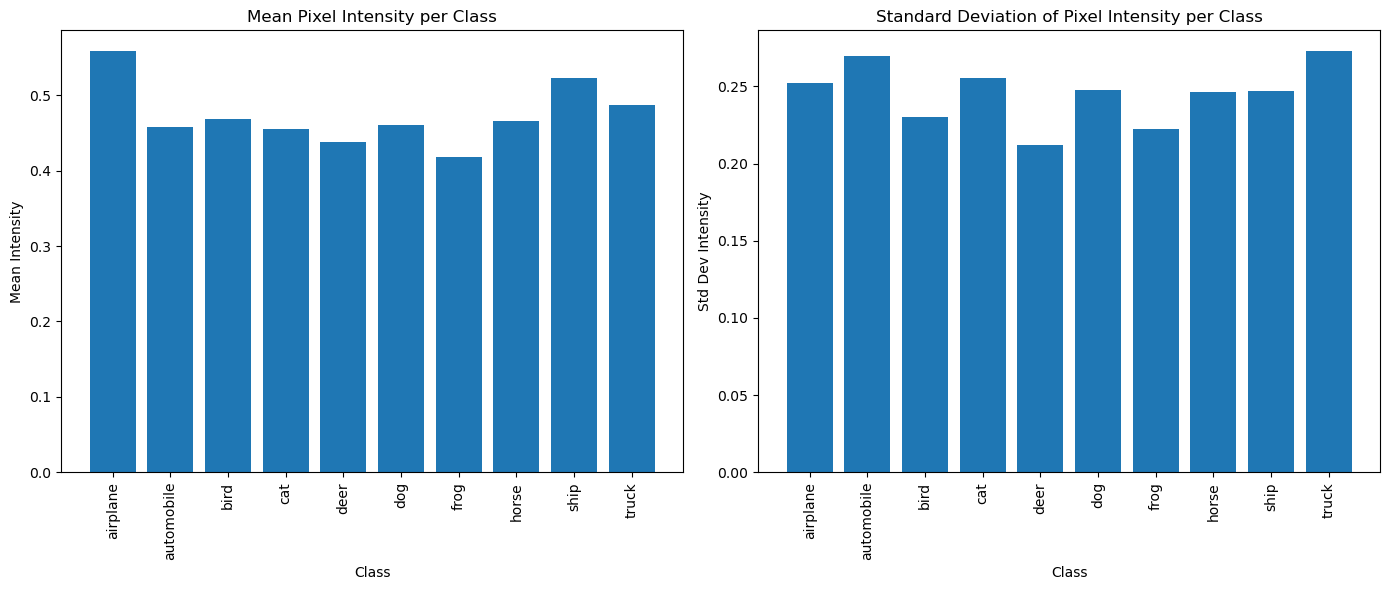

In [36]:
# Calculate mean and std deviation for each class
means = []
stds = []
variances = []
for label in range(10):
    class_data = all_train_data[all_train_labels == label]
    means.append(np.mean(class_data, axis=(0, 1, 2)))
    stds.append(np.std(class_data, axis=(0, 1, 2))) 
    variances.append(np.var(class_data, axis=(0, 1, 2)))

# Convert to proper format in a numpy array
means = np.array(means)
stds = np.array(stds)
variances = np.array(variances)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Mean Plot
axes[0].bar(range(10), np.mean(means, axis=1))
axes[0].set_title("Mean Pixel Intensity per Class")
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Mean Intensity")
axes[0].set_xticks(range(10))
axes[0].set_xticklabels(classes, rotation=90)

# Std dev Plot
axes[1].bar(range(10), np.mean(stds, axis=1))
axes[1].set_title("Standard Deviation of Pixel Intensity per Class")
axes[1].set_xlabel("Class")
axes[1].set_ylabel("Std Dev Intensity")
axes[1].set_xticks(range(10))
axes[1].set_xticklabels(classes, rotation=90)

plt.tight_layout()
plt.show()

In [37]:
# Calculate mean and std deviation for each RGB in each class
means_rgb = []
stds_rgb = []
variances_rgb = []

# Compute numbers for each color in each class
for label in range(10):
    class_data = all_train_data[all_train_labels == label]
    
    # Calculate the mean, std dev, and variance for each channel (Red, Green, Blue)
    mean_rgb = np.mean(class_data, axis=(0, 1, 2))  
    std_rgb = np.std(class_data, axis=(0, 1, 2)) 
    var_rgb = np.var(class_data, axis=(0, 1, 2))
    
    # Append
    means_rgb.append(mean_rgb)
    stds_rgb.append(std_rgb)
    variances_rgb.append(var_rgb)

# Convert to proper format in a numpy array
means_rgb = np.array(means_rgb)
stds_rgb = np.array(stds_rgb)
variances_rgb = np.array(variances_rgb)

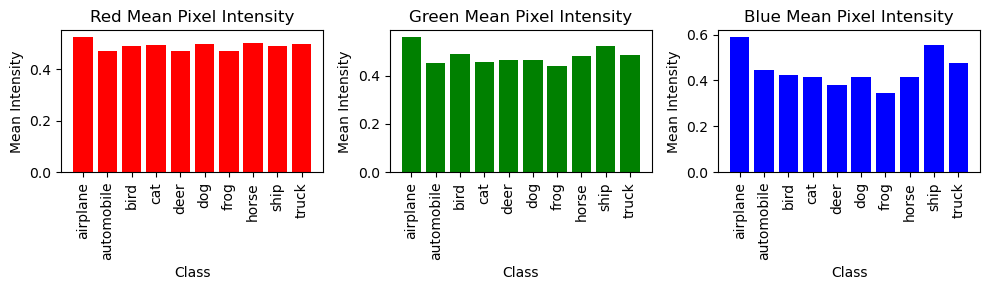

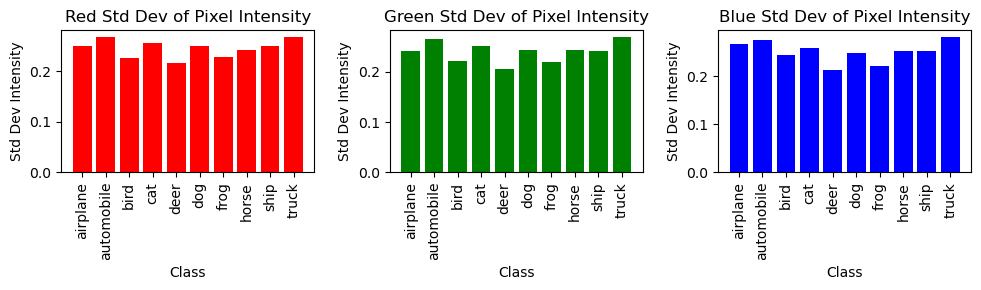

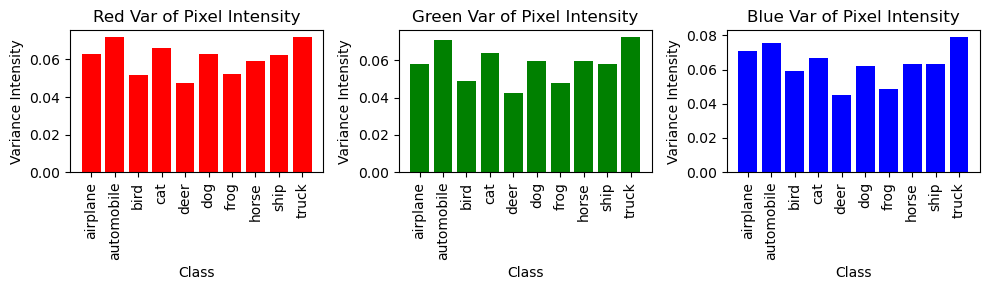

In [90]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

# Mean per color channel
colors = ['Red', 'Green', 'Blue']
for i, color in enumerate(colors):
    axes[i].bar(range(10), means_rgb[:, i], color=color.lower())
    axes[i].set_title(f"{color} Mean Pixel Intensity")
    axes[i].set_xlabel("Class")
    axes[i].set_ylabel("Mean Intensity")
    axes[i].set_xticks(range(10))
    axes[i].set_xticklabels(classes, rotation=90)

plt.tight_layout()
plt.show()

# std dev per channel
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for i, color in enumerate(colors):
    axes[i].bar(range(10), stds_rgb[:, i], color=color.lower())
    axes[i].set_title(f"{color} Std Dev of Pixel Intensity")
    axes[i].set_xlabel("Class")
    axes[i].set_ylabel("Std Dev Intensity")
    axes[i].set_xticks(range(10))
    axes[i].set_xticklabels(classes, rotation=90)

plt.tight_layout()
plt.show()

# variance per channel
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for i, color in enumerate(colors):
    axes[i].bar(range(10), variances_rgb[:, i], color=color.lower())
    axes[i].set_title(f"{color} Var of Pixel Intensity")
    axes[i].set_xlabel("Class")
    axes[i].set_ylabel("Variance Intensity")
    axes[i].set_xticks(range(10))
    axes[i].set_xticklabels(classes, rotation=90)

plt.tight_layout()
plt.show()


### Image Variance per Class

- Low variance in a class suggests that the images within that class are visually similar (example: images of a dog may have similar color patterns or lighting).
- High variance indicates a class with more diverse images (example: cars may appear in different environments, lighting conditions, or from different angles)

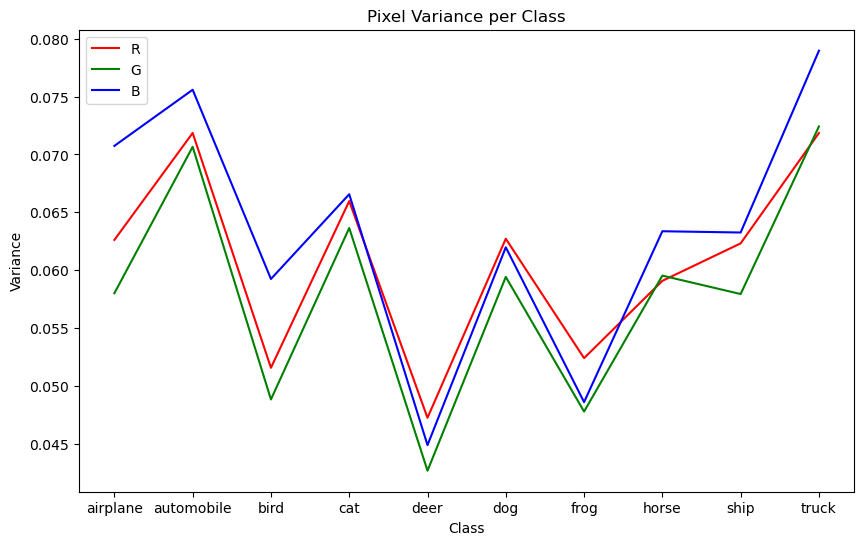

In [41]:
class_variances = []

for label in range(10):
    class_data = all_train_data[all_train_labels == label]
    class_variance = np.var(class_data, axis=(0, 1, 2))
    class_variances.append(class_variance)

# Plot
class_variances = np.array(class_variances)
plt.figure(figsize=(10, 6))
plt.plot(classes, class_variances[:, 0], label="R", color="red")
plt.plot(classes, class_variances[:, 1], label="G", color="green")
plt.plot(classes, class_variances[:, 2], label="B", color="blue")
plt.title("Pixel Variance per Class")
plt.xlabel("Class")
plt.ylabel("Variance")
plt.legend()
plt.show()

### Groupings Between Classes

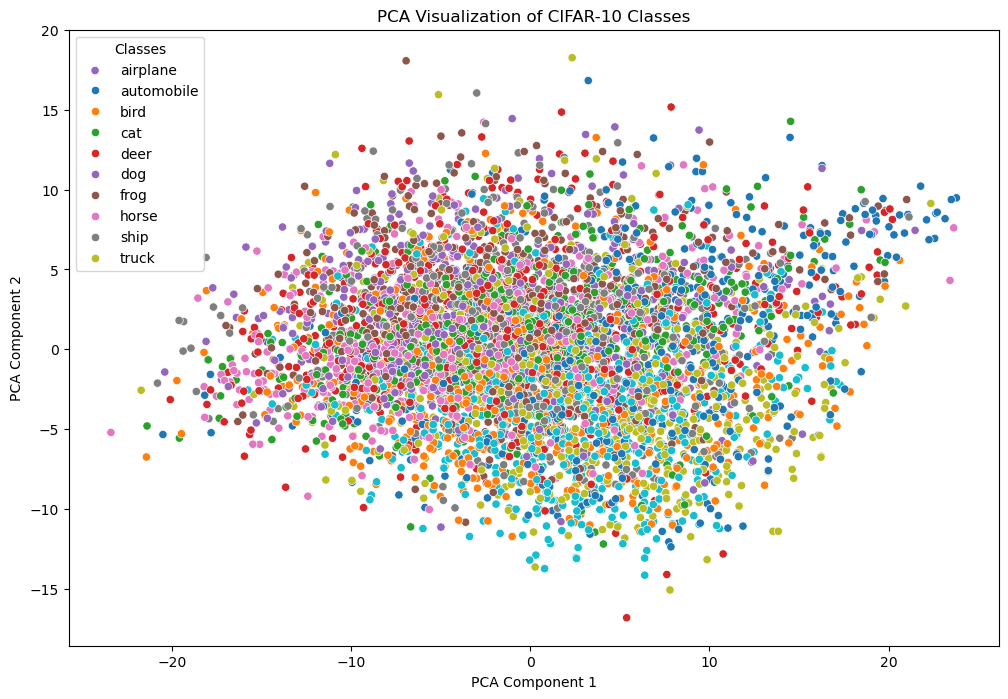

In [79]:
num_samples = 6000 #makes PCA run faster of number is lower, can adjust
sample_index = np.random.choice(len(all_train_data), num_samples, replace=False)
sample_data = all_train_data[sample_index].reshape(num_samples, -1)  # Flatten each image
sample_labels = all_train_labels[sample_index]

# Flatten entire dataset for PCA
all_train_data_flat = all_train_data.reshape(all_train_data.shape[0], -1)

# Perform PCA on flattened data, reducing to 2 components
pca = PCA(n_components=2)
reduced_data_pca = pca.fit_transform(all_train_data_flat)

# Plot PCA results for sampled data
plt.figure(figsize=(12, 8))
sns.scatterplot(x=reduced_data_pca[sample_index, 0], y=reduced_data_pca[sample_index, 1], 
                hue=sample_labels, palette="tab10", legend='full')
plt.title("PCA Visualization of CIFAR-10 Classes")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Classes", labels=labels, loc="best")
plt.show()


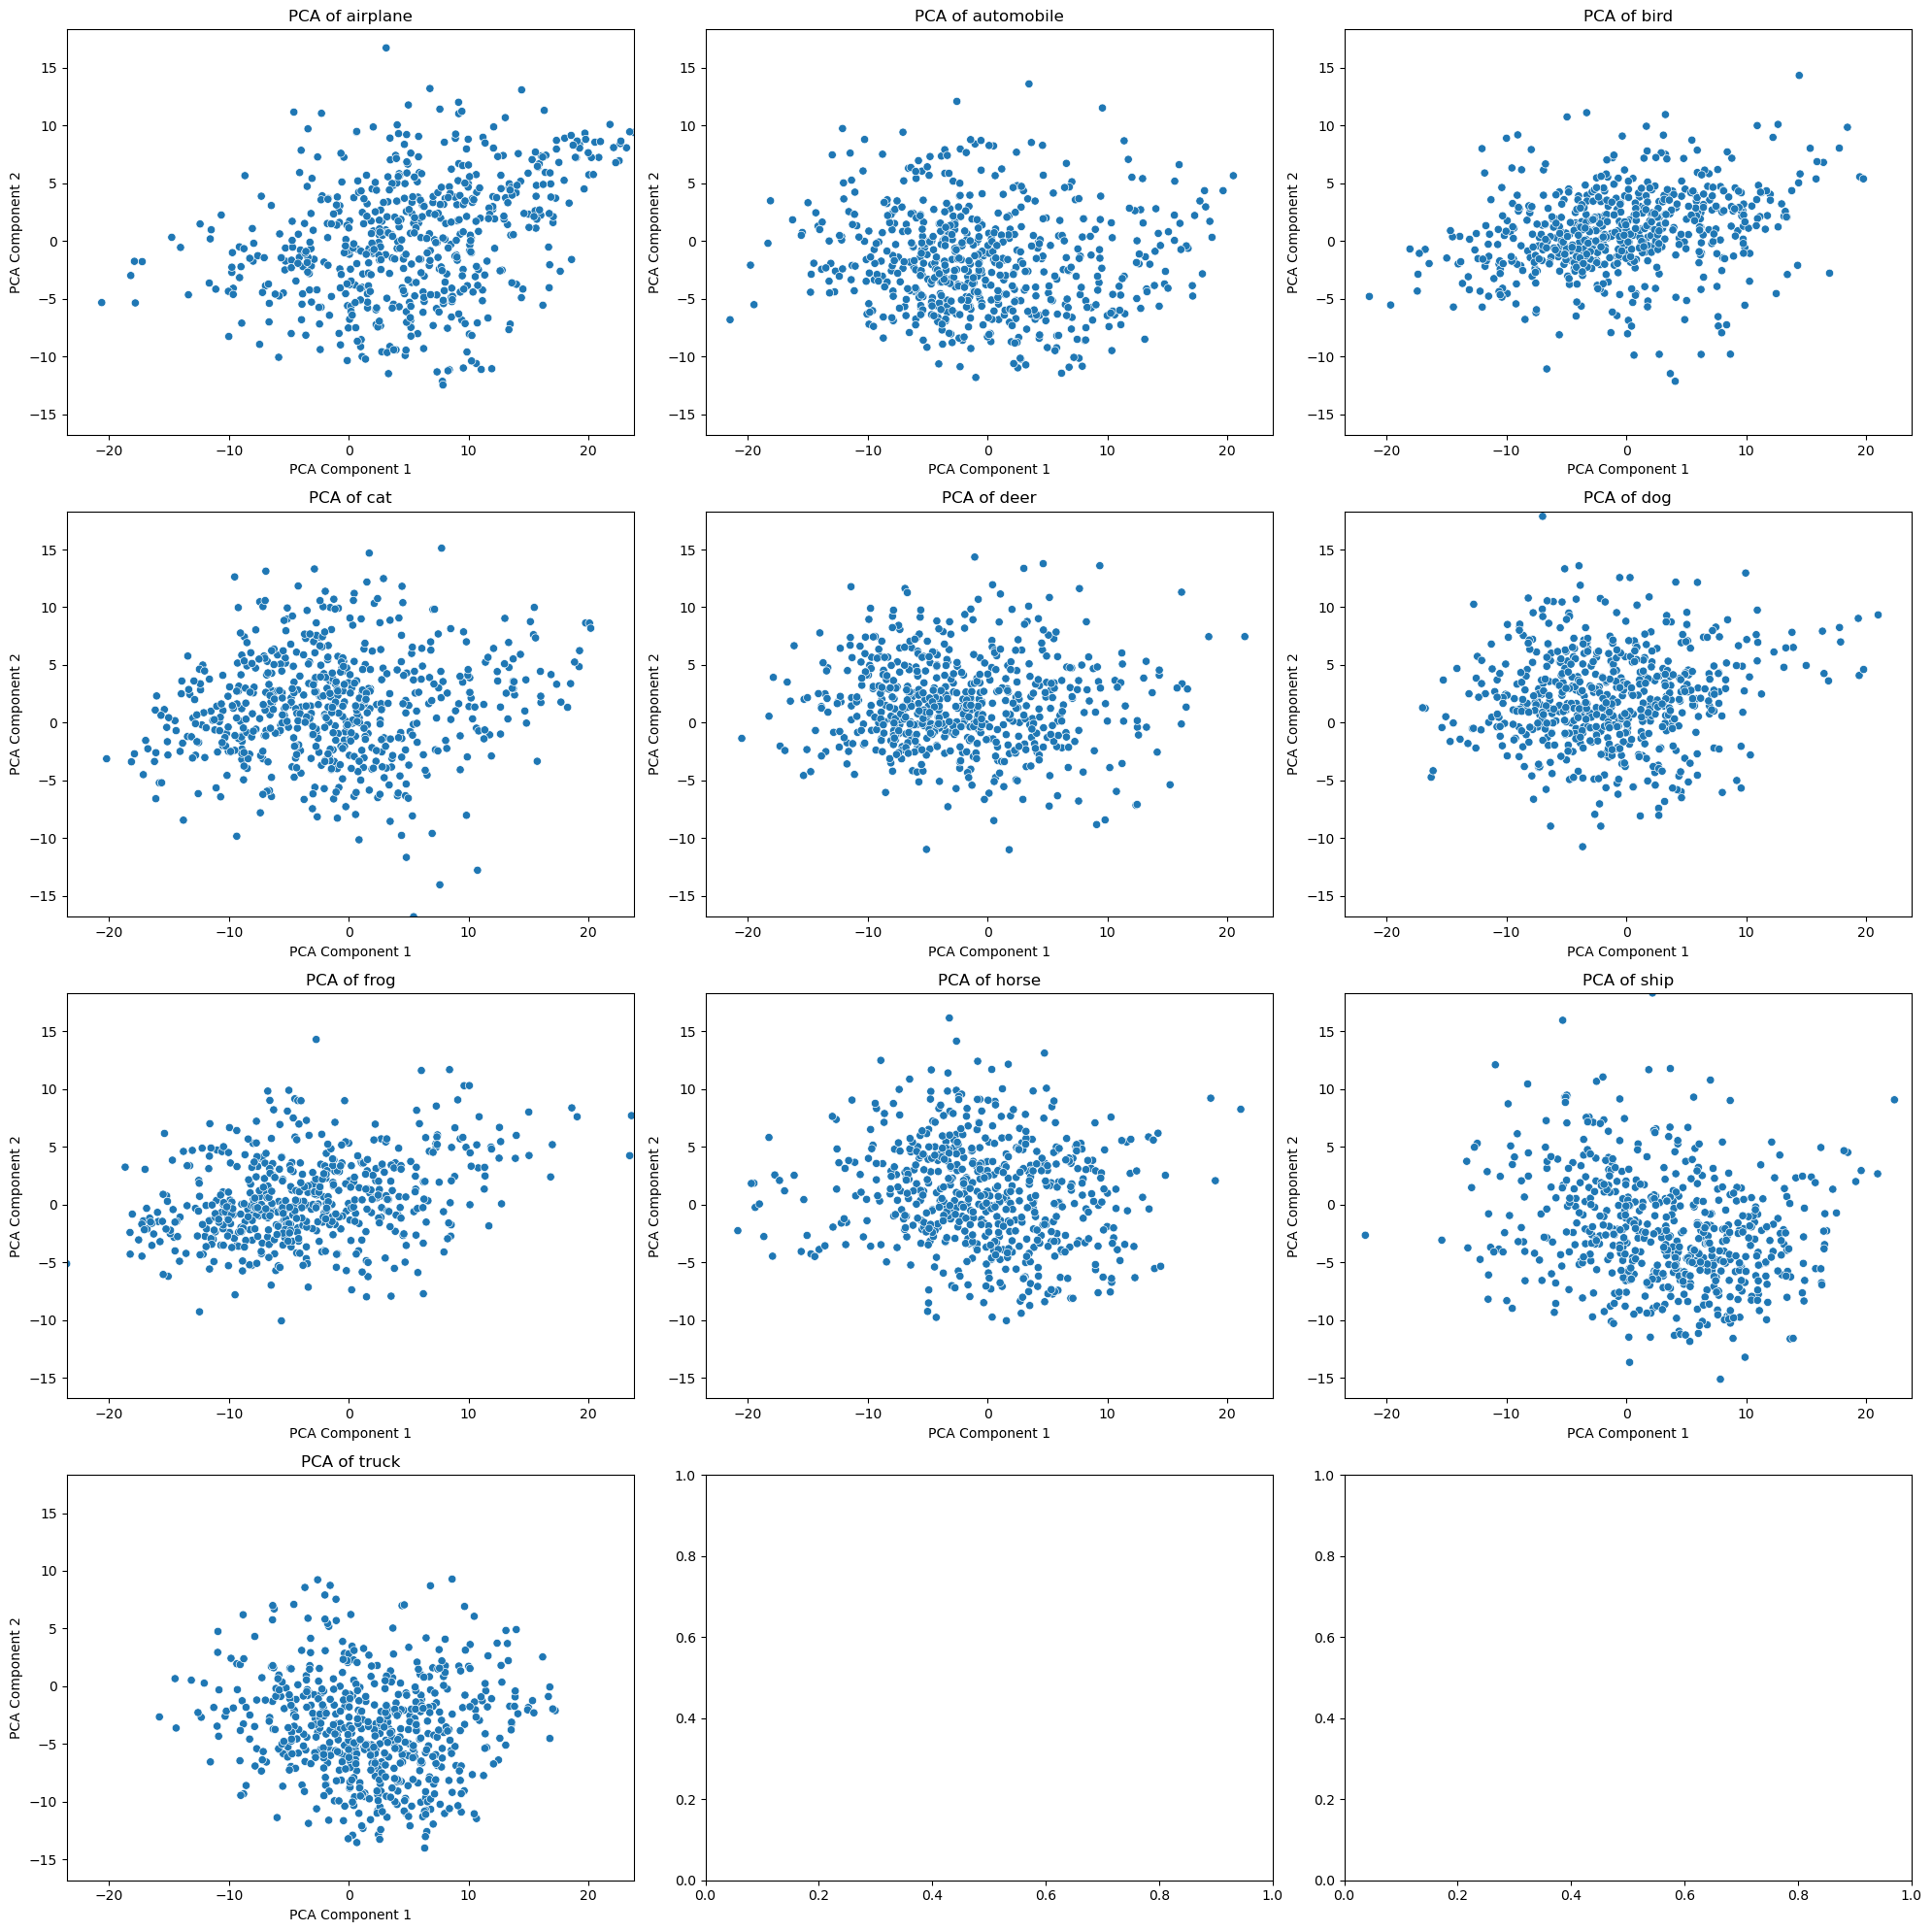

In [94]:

# Class names corresponding to CIFAR-10 labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Flatten the images into 2D arrays (num_samples, height * width * 3)
sample_data_reshaped = sample_data.reshape(sample_data.shape[0], -1)

# Reduce data to 2 components using PCA
pca = PCA(n_components=2)
reduced_data_pca = pca.fit_transform(sample_data_reshaped)

# Calculate min and max values across all PCA components for consistent axis limits
x_min, x_max = reduced_data_pca[:, 0].min(), reduced_data_pca[:, 0].max()
y_min, y_max = reduced_data_pca[:, 1].min(), reduced_data_pca[:, 1].max()

# Create subplots with one row and 10 columns (one per class)
fig, axes = plt.subplots(4, 3, figsize=(20, 20))  # 4 rows, 3 columns for CIFAR-10 classes
axes = axes.flatten()  # Flatten the 2D axes array into a 1D array for easier indexing

# For each class, plot in a separate subplot
for label in range(10):
    # Select data points corresponding to the current class
    class_data = reduced_data_pca[sample_labels == label]
    class_labels = sample_labels[sample_labels == label]
    
    # Plot the PCA results for the current class
    sns.scatterplot(x=class_data[:, 0], y=class_data[:, 1], hue=class_labels, palette="tab10", ax=axes[label])
    
    # Set the title to the actual class name
    axes[label].set_title(f"PCA of {class_names[label]}")
    axes[label].set_xlabel("PCA Component 1")
    axes[label].set_ylabel("PCA Component 2")
    axes[label].legend([], frameon=False)  # Remove legend to avoid clutter
    
    # Set the same axis limits for all subplots
    axes[label].set_xlim(x_min, x_max)
    axes[label].set_ylim(y_min, y_max)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


## References

In [ ]:
#https://www.youtube.com/watch?v=pBOfQTfDMVg
#https://medium.com/geekculture/eda-for-image-classification-dcada9f2567a
#https://www.kaggle.com/code/datark1/eda-images-processing-and-exploration
#https://www.youtube.com/watch?v=7HPwo4wnJeA
#https://www.kaggle.com/code/adtysregita/pca-application-using-cifar10-dataset
#https://www.kaggle.com/code/rever3nd/basic-image-classification-on-cifar-10-dataset